# Image Classifier with MobileNetV2 vs. ResNet50 vs. VGG16

**Building an image classifier**

1.  Chopping up the image into slices of 224x224 pixels
2.  Predicting labels using a pre-trained network (e.g. MobileNet)
3.  Collecting labels / predictions for all slices
4.  Filtering out predictions that are below a certain probability threshold
5.  Analyzing the results

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from PIL import Image, ImageOps

#Our Models to play around with:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
CHOSEN_MODEL = VGG16
IMAGE_WIDTH = 996
IMAGE_BORDER = True
STEPS_FOR_FRAME_ITERATIONS_X = 14 #14, 28, 56, 112
STEPS_FOR_FRAME_ITERATIONS_Y = STEPS_FOR_FRAME_ITERATIONS_X
ACCURACY_THRESHOLD = 0.9

#### Let's use Keras' image module to load and manipulate images!

**Note**, there are many ways to read in images in python; for example:
- `matplotlib.pyplot.plt.imread()`
- `cv2.imread()`
- `tensorflow.keras.preprocessing.image.load_img()`
- `PIL.Image.open()`
 
Pick whichever method works for you! The most important thing at the end of the day is that we can work with the image as an array.

In [ ]:
basewidth = IMAGE_WIDTH
img = Image.open('/content/drive/MyDrive/Colab Notebooks/finding_nemo/images/aquarium.jpg')
wpercent = (basewidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((basewidth,hsize), Image.ANTIALIAS)

if IMAGE_BORDER == True:
  img = ImageOps.expand(img, border=50, fill='grey')
  
#img.save('/content/drive/MyDrive/Colab Notebooks/nemo/pictures/aquarium.jpg')

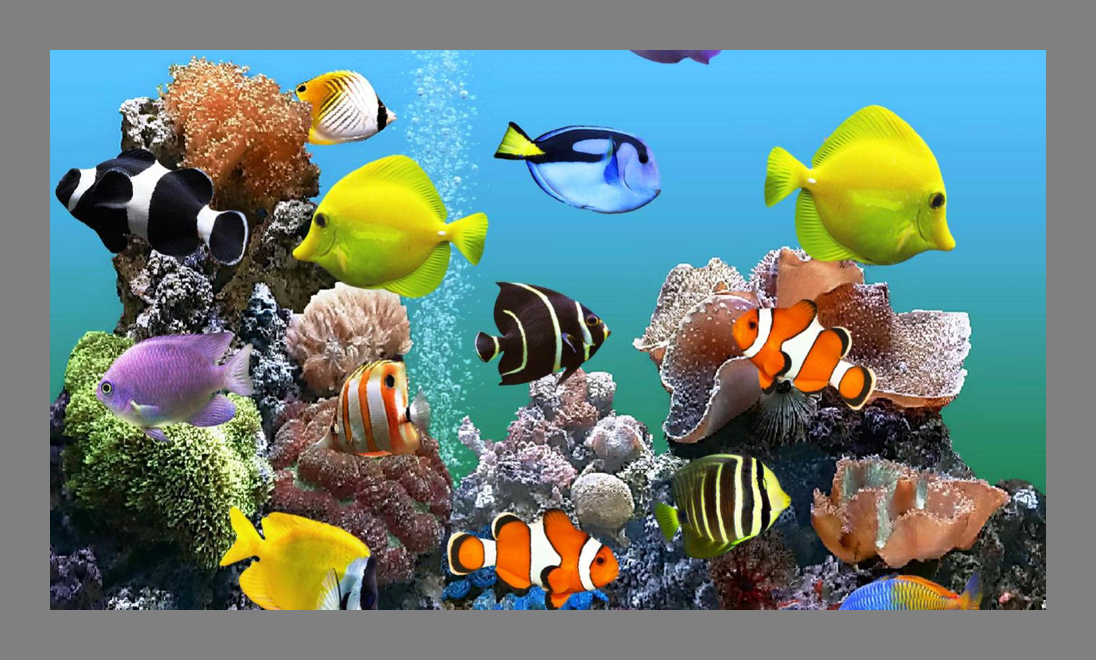

In [ ]:
img

### Convert the image to an array, and check out some of the properties.

In [ ]:
img_array = image.img_to_array(img)

In [ ]:
img_array.shape, img_array.size

((660, 1096, 3), 2170080)

### Extract a single 1x224x224x3 slice of the image
- Those are the dimensions of the images from the ImageNet data set (on which many popular models were trained, e.g. VGG, MobileNet)

In [ ]:
fish = img_array[0:224, 0:224, :]

In [ ]:
fish = np.expand_dims(fish, axis=0) # to add the extra "1" dimension

### Create a prediction from the image slice

In [ ]:
model = CHOSEN_MODEL(weights='imagenet', include_top=True)

553467904/553467096 [==============================] - 7s 0us/step


In [ ]:
#model.summary()

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
           metrics=['accuracy'])

In [ ]:
predictions = model.predict(fish)

In [ ]:
decode_predictions(predictions)

40960/35363 [==================================] - 0s 0us/step


[[('n03476684', 'hair_slide', 0.15074214),
  ('n06359193', 'web_site', 0.051475987),
  ('n03916031', 'perfume', 0.041662738),
  ('n04522168', 'vase', 0.038793426),
  ('n03530642', 'honeycomb', 0.034895346)]]

### Collect multiple slices / "tiles" by looping over the image.

In [ ]:
tiles = []

for x in range(0, 1920, STEPS_FOR_FRAME_ITERATIONS_X): 
    
    for y in range(0, 1080, STEPS_FOR_FRAME_ITERATIONS_Y): 
        
        tile = img_array[x:x+224, y:y+224, :]
        
        if tile.shape == (224, 224, 3):
            
            tiles.append(tile)

### Use the pre-trained model to make predictions on the collected image tiles

In [ ]:
tiles = np.array(tiles)

In [ ]:
predictions = decode_predictions(model.predict(tiles))

### Collect labels with the highest probabilty.

In [ ]:
prediction_nr = 0
nemo_count = 0
confidence_count = 0
confident_nemo_count = 0

for i in predictions:
  if predictions[prediction_nr][0][1] == 'anemone_fish':
    nemo_count +=1
    if predictions[prediction_nr][0][2] > ACCURACY_THRESHOLD:
      confident_nemo_count +=1
      print('Perfect Nemo in the frame nr.: '+str(prediction_nr))
      print()
  if predictions[prediction_nr][0][2] > ACCURACY_THRESHOLD:
    confidence_count +=1
  prediction_nr += 1

print('=========================================================')
print()
print('The selected model is: '+str(CHOSEN_MODEL))
print('The steps for x-axis iterations are: '+str(STEPS_FOR_FRAME_ITERATIONS_X))
print('Image width is: '+str(IMAGE_WIDTH))
print('Total number of 224x224 frames: '+str(len(predictions)))
print()
print('Frames with Nemos: '+str(nemo_count))
print('Frames with accuracy threshold over '+str(ACCURACY_THRESHOLD)+': '+str(confidence_count))
print('Frames with accuracy of Nemo over '+str(ACCURACY_THRESHOLD)+': '+str(confident_nemo_count))
print()
print('=========================================================')
print()

prediction_nr = 0

for i in predictions:
  #if predictions[prediction_nr][0][1] == 'anemone_fish':
    #print('Found Nemo in frame nr.: '+str(prediction_nr)+' with an accuracy score of '+str(predictions[prediction_nr][0][2]))
    #print('---')
    #print()
  if predictions[prediction_nr][0][2] > ACCURACY_THRESHOLD:
    print('Prediction for frame nr.: ' + str(prediction_nr))
    print('Best guess is: '+str(predictions[prediction_nr][0][2])+str(' ')+str(predictions[prediction_nr][0][1]))
    print('Second best guess is: '+str(predictions[prediction_nr][1][2])+str(' ')+str(predictions[prediction_nr][1][1]))
    print('---')
    print()
  prediction_nr += 1

Perfect Nemo in the frame nr.: 260

Perfect Nemo in the frame nr.: 261

Perfect Nemo in the frame nr.: 323

Perfect Nemo in the frame nr.: 891

Perfect Nemo in the frame nr.: 1021

Perfect Nemo in the frame nr.: 1087

Perfect Nemo in the frame nr.: 1147


The selected model is: <function VGG16 at 0x7ff1bbe0e710>
The steps for x-axis iterations are: 14
Image width is: 996
Total number of 224x224 frames: 2016

Frames with Nemos: 452
Frames with accuracy threshold over 0.9: 118
Frames with accuracy of Nemo over 0.9: 7


Prediction for frame nr.: 52
Best guess is: 0.9293479 goldfish
Second best guess is: 0.03729116 rock_beauty
---

Prediction for frame nr.: 119
Best guess is: 0.989906 piggy_bank
Second best guess is: 0.0023762162 goldfish
---

Prediction for frame nr.: 120
Best guess is: 0.9748956 piggy_bank
Second best guess is: 0.0071833576 conch
---

Prediction for frame nr.: 122
Best guess is: 0.955608 piggy_bank
Second best guess is: 0.01479527 nipple
---

Prediction for frame nr.: 12